Banded Matrix Multiplication Results

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO


In [23]:
naive_results = '''
GridDim,BlockDim,FLOPS,GFLOPS
1024,1,4.46582e+09,4.46582
512,2,8.11437e+09,8.11437
342,3,1.12676e+10,11.2676
256,4,1.39888e+10,13.9888
205,5,1.43354e+10,14.3354
171,6,1.39758e+10,13.9758
147,7,1.39525e+10,13.9525
128,8,1.78088e+10,17.8088
114,9,1.20373e+10,12.0373
103,10,1.40226e+10,14.0226
94,11,1.38998e+10,13.8998
86,12,1.21356e+10,12.1356
79,13,1.24467e+10,12.4467
74,14,1.16926e+10,11.6926
69,15,1.22876e+10,12.2876
64,16,1.21886e+10,12.1886
61,17,1.09938e+10,10.9938
57,18,1.0791e+10,10.791
54,19,1.09303e+10,10.9303
52,20,1.04108e+10,10.4108
49,21,1.02745e+10,10.2745
47,22,1.02665e+10,10.2665
45,23,9.74759e+09,9.74759
43,24,9.85403e+09,9.85403
41,25,9.51803e+09,9.51803
40,26,9.37249e+09,9.37249
38,27,8.91651e+09,8.91651
37,28,9.28119e+09,9.28119
36,29,8.61685e+09,8.61685
35,30,8.40325e+09,8.40325
34,31,8.03466e+09,8.03466
32,32,7.57236e+09,7.57236
'''

df_naive = pd.read_csv(StringIO(naive_results), index_col=0)

In [25]:
smem_results = '''
GridDim,BlockDim,FLOPS,GFLOPS
1024,1,6.26655e+09,6.26655
512,2,1.32315e+10,13.2315
342,3,1.96143e+10,19.6143
256,4,2.52358e+10,25.2358
205,5,2.95197e+10,29.5197
171,6,2.39349e+10,23.9349
147,7,2.50248e+10,25.0248
128,8,2.6216e+10,26.216
114,9,2.29079e+10,22.9079
103,10,2.30398e+10,23.0398
94,11,2.07379e+10,20.7379
86,12,2.13665e+10,21.3665
79,13,1.99787e+10,19.9787
74,14,2.07439e+10,20.7439
69,15,2.13635e+10,21.3635
64,16,1.57438e+10,15.7438
61,17,2.02642e+10,20.2642
57,18,1.90755e+10,19.0755
54,19,1.86163e+10,18.6163
52,20,1.77472e+10,17.7472
49,21,1.81736e+10,18.1736
47,22,1.79018e+10,17.9018
45,23,1.77121e+10,17.7121
43,24,1.58222e+10,15.8222
41,25,1.73057e+10,17.3057
40,26,1.73905e+10,17.3905
38,27,1.71164e+10,17.1164
37,28,1.65226e+10,16.5226
36,29,1.72156e+10,17.2156
35,30,1.69715e+10,16.9715
34,31,1.74204e+10,17.4204
32,32,8.97544e+09,8.97544
'''

df_smem = pd.read_csv(StringIO(smem_results), index_col=0)

In [35]:
df_all = pd.concat([df_naive, df_smem], axis=1, keys=["naive", "smem"])

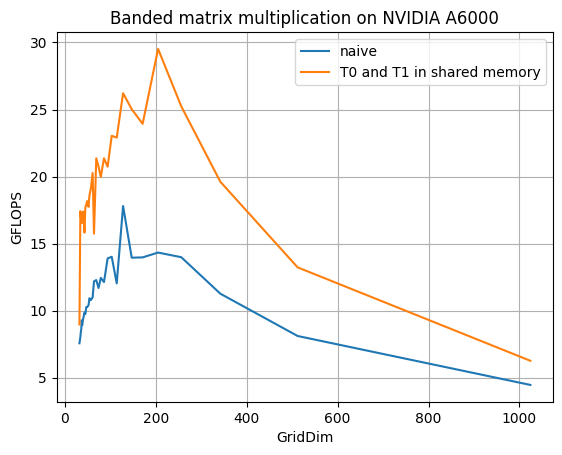

In [37]:
plt.plot(df_all.index, df_all["naive"]["GFLOPS"], label="naive")
plt.plot(df_all.index, df_all["smem"]["GFLOPS"], label="T0 and T1 in shared memory")
plt.title("Banded matrix multiplication on NVIDIA A6000")
plt.xlabel("GridDim")
plt.ylabel("GFLOPS")
plt.legend()
plt.grid()
plt.show()